In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_trial_dataframe
from utils import get_trial_paths


In [4]:
# Replace with the path to the logs directory in multi-memory-task
logs_path = '/Users/isabella/multi-memory-task/logs' 

# Replace this with the name of the dataset directories
datasets = ['2023_06_09_13_31_42', '2023_06_09_14_54_41']

trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=datasets)
df = get_trial_dataframe.get_trial_dataframe(trial_paths=trial_paths)


Number of trials:  110


(array([25.,  5., 20.,  6., 15., 12.,  3.,  0.,  0., 22.]),
 array([0.39932489, 0.59955003, 0.79977517, 1.00000031, 1.20022545,
        1.40045059, 1.60067573, 1.80090086, 2.001126  , 2.20135114,
        2.40157628]),
 <BarContainer object of 10 artists>)

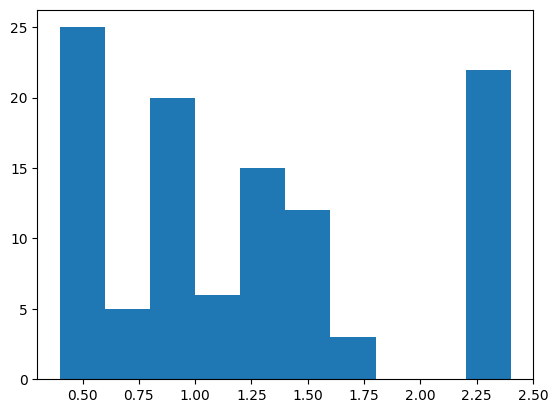

In [5]:
plt.hist(df["delay_s"])

(array([], dtype=int64),)

<Axes: ylabel='Frequency'>

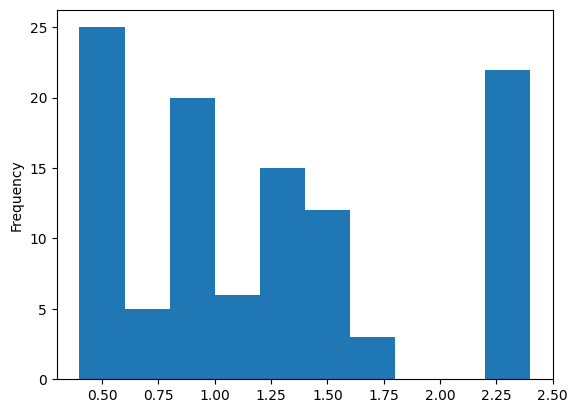

In [30]:
correct = np.where(df['correct'] == 'True')
# df.groupby([df, 'delay_s']).count()

# df.groupby('delay_s')['correct'].plot(kind='hist')
display(correct)
df['delay_s'].plot(kind= 'hist')
